In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [24]:
df = pd.read_csv('/Users/hpourmand/Desktop/Coursera/Olympics/olympics.csv', encoding='ISO-8859-1')

# The first few rows of the dataset
df = df.head()
df

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


#### Basic Data Information

In [20]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 15316 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.4+ MB
None
               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000
City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete  

#### Medal distribution by country

#### Find and Remove Duplicates

In [25]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print(f'Number of duplicate rows: {len(duplicate_rows)}')

# Remove duplicates
df = df.drop_duplicates()

print(f'Shape of the dataset after removing duplicates: {df.shape}')

Number of duplicate rows: 0
Shape of the dataset after removing duplicates: (5, 11)


#### Find Missing Values

In [27]:
# Check for duplicates
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Columns with missing values
missing_columns = missing_values[missing_values > 0].index
print(f'Columns with missing values: {missing_columns}')


Missing values in each column:
City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64
Columns with missing values: Index([], dtype='object')


#### Impute Missing Values

In [30]:
for column in missing_columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].mean(), inplace=True)

# Verify if missing values are handled
print('Missing values after imputation:')
print(df.isnull().sum())

Missing values after imputation:
City            0
Year            0
Sport           0
Discipline      0
Event           0
Athlete         0
Gender          0
Country_Code    0
Country         0
Event_gender    0
Medal           0
dtype: int64


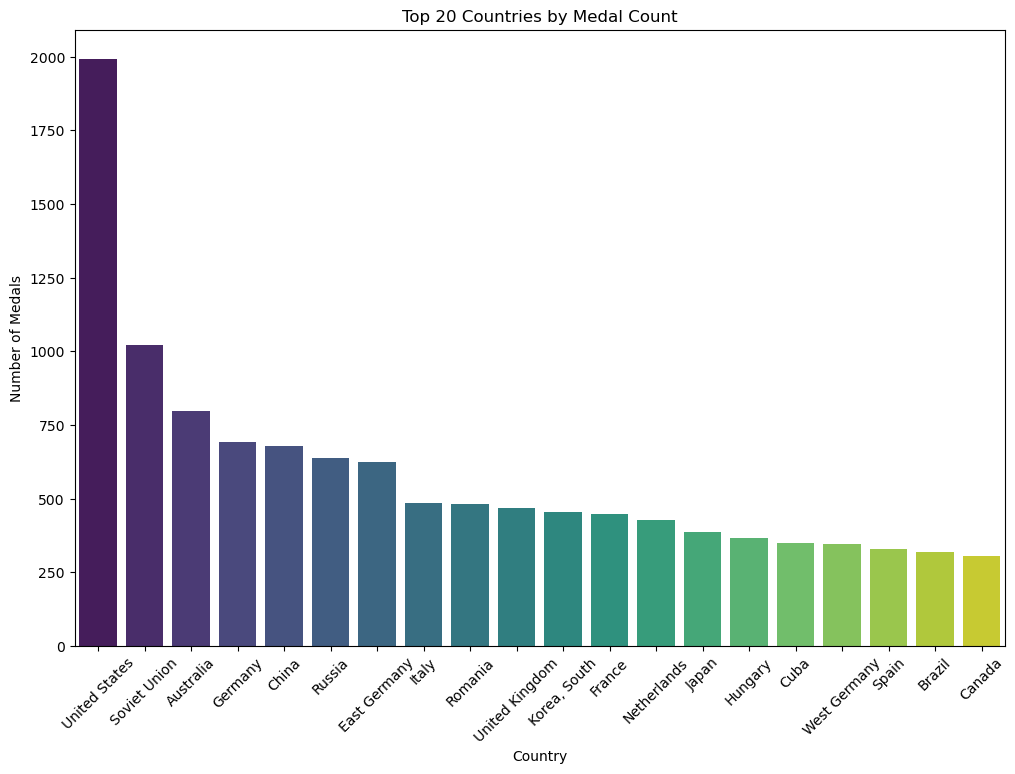

In [9]:
plt.figure(figsize = (12, 8))
medal_count = df['Country'].value_counts().head(20)
sns.barplot(x = medal_count.index, y = medal_count.values, palette = 'viridis')
plt.title('Top 20 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation = 45)
plt.show()

#### Medal distribution by year

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


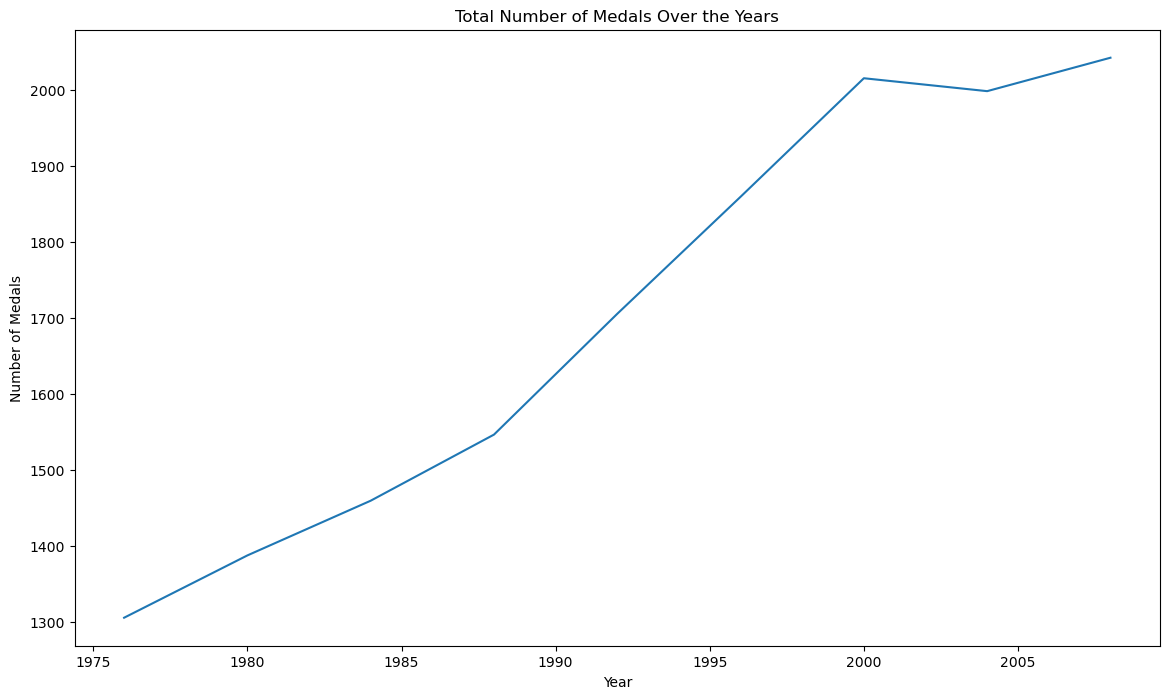

In [8]:
plt.figure(figsize = (14, 8))
yearly_medals = df.groupby('Year')['Medal'].count()
sns.lineplot(x = yearly_medals.index, y = yearly_medals.values)
plt.title('Total Number of Medals Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.show()

#### Top athletes by medal count

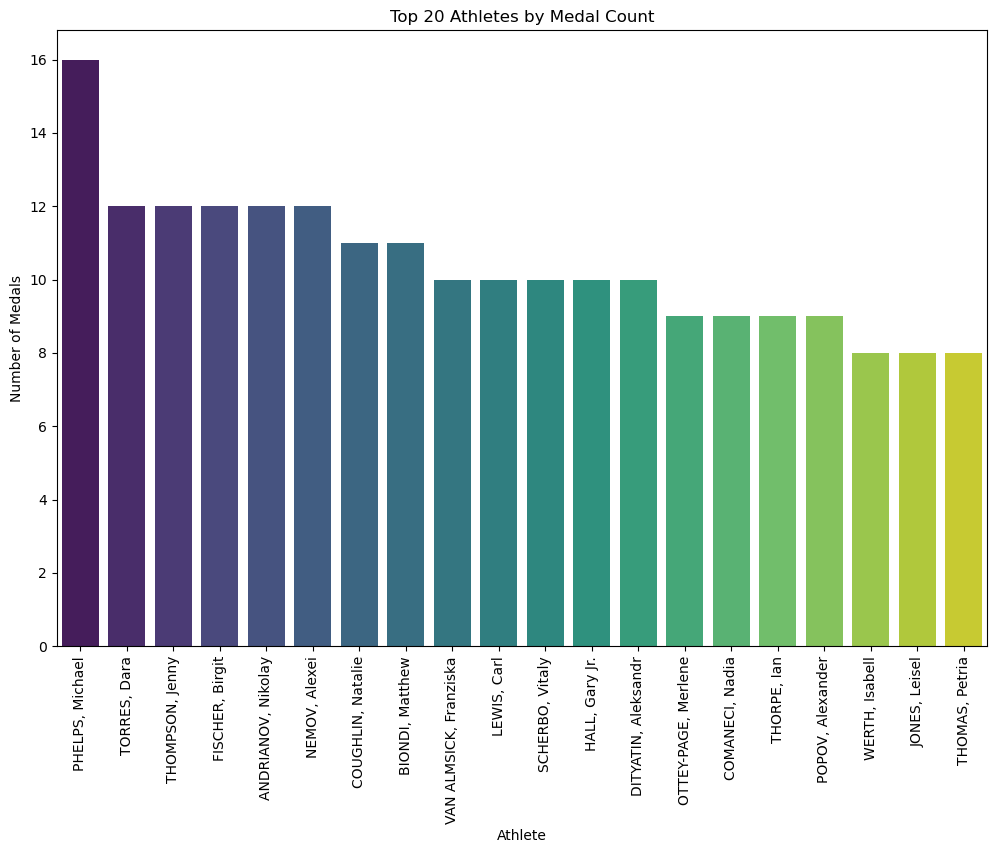

In [11]:
plt.figure(figsize = (12, 8))
top_athletes = df['Athlete'].value_counts().head(20)
sns.barplot(x = top_athletes.index, y = top_athletes.values, palette = 'viridis')
plt.title('Top 20 Athletes by Medal Count')
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.xticks(rotation = 90)
plt.show()

#### Medal distribution by sport

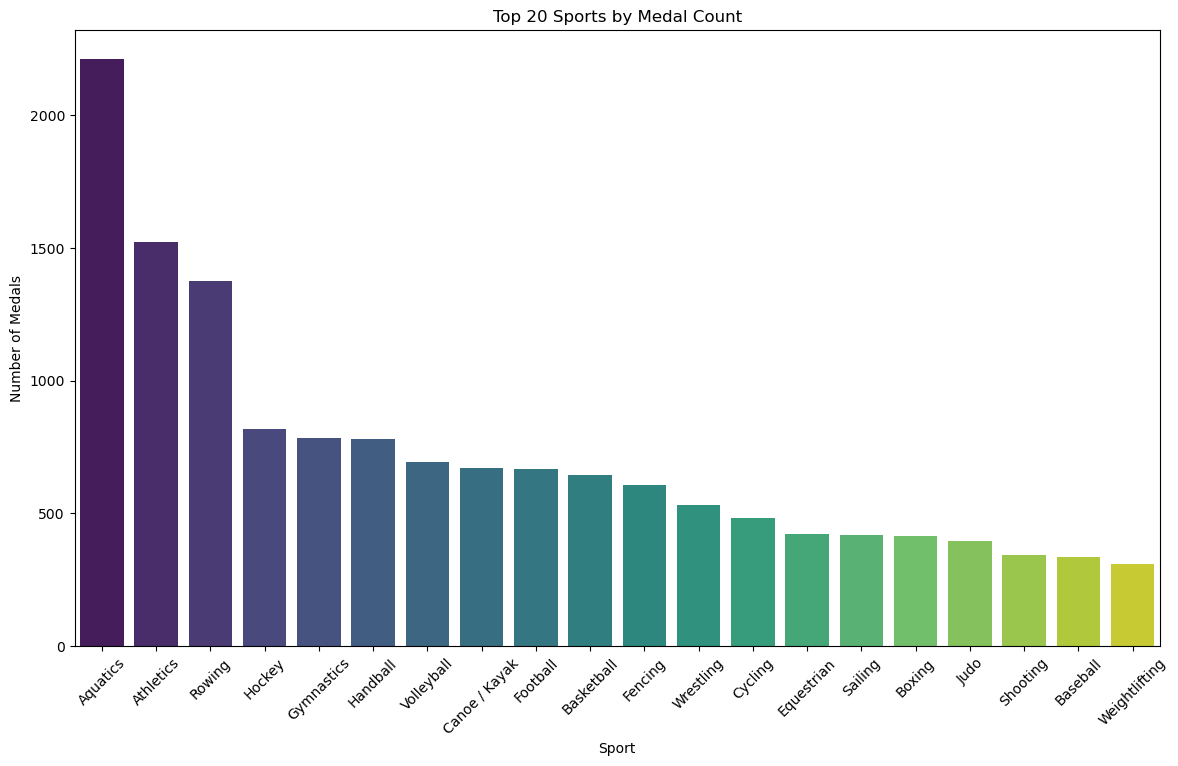

In [13]:
plt.figure(figsize = (14, 8))
top_sports = df['Sport'].value_counts().head(20)
sns.barplot(x = top_sports.index, y = top_sports.values, palette = 'viridis')
plt.title('Top 20 Sports by Medal Count')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation = 45)
plt.show()

#### Medal distribution by gender

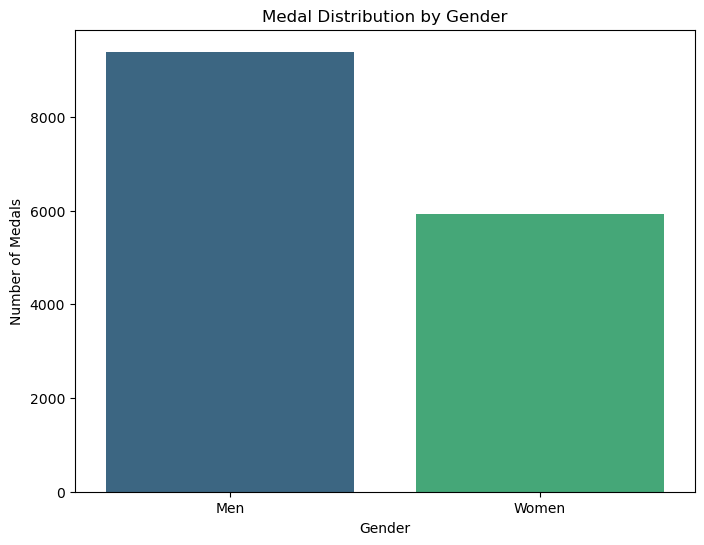

In [15]:
plt.figure(figsize = (8, 6))
gender_count = df['Gender'].value_counts()
sns.barplot(x = gender_count.index, y = gender_count.values, palette = 'viridis')
plt.title('Medal Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Medals')
plt.show()

#### Distribution of medals (Gold, Silver, Bronze)

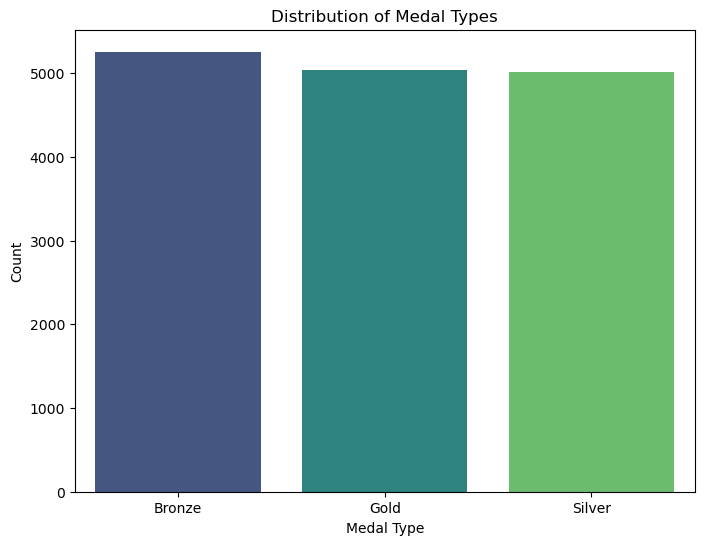

In [17]:
plt.figure(figsize = (8, 6))
medal_type_count = df['Medal'].value_counts()
sns.barplot(x = medal_type_count.index, y = medal_type_count.values, palette = 'viridis')
plt.title('Distribution of Medal Types')
plt.xlabel('Medal Type')
plt.ylabel('Count')
plt.show()